# **Brain MRI segmentation**
**by Meetra Nouri**

# **About Dataset**

**LGG Segmentation Dataset**

Dataset used in:

Mateusz Buda, AshirbaniSaha, Maciej A. Mazurowski "Association of genomic subtypes of lower-grade gliomas with shape features automatically extracted by a deep learning algorithm." Computers in Biology and Medicine, 2019.

and

Maciej A. Mazurowski, Kal Clark, Nicholas M. Czarnek, Parisa Shamsesfandabadi, Katherine B. Peters, Ashirbani Saha "Radiogenomics of lower-grade glioma: algorithmically-assessed tumor shape is associated with tumor genomic subtypes and patient outcomes in a multi-institutional study with The Cancer Genome Atlas data." Journal of Neuro-Oncology, 2017.

**This dataset contains brain MRI images together with manual FLAIR abnormality segmentation masks.**

The images were obtained from The Cancer Imaging Archive (TCIA).

They correspond to 110 patients included in The Cancer Genome Atlas (TCGA) lower-grade glioma collection with at least fluid-attenuated inversion recovery (FLAIR) sequence and genomic cluster data available.

Tumor genomic clusters and patient data is provided in data.csv file.


The Brain MRI Segmentation dataset available on Kaggle is a collection of Magnetic Resonance Imaging (MRI) scans of the brain along with their corresponding segmented labels. This dataset is designed for training and evaluating deep learning models for automated brain segmentation.

The dataset consists of 3D MRI volumes of 110 patients with brain tumors, which were collected from The Cancer Imaging Archive (TCIA). The MRI images were preprocessed and skull-stripped to remove non-brain tissue before being saved in NIfTI format. The dataset contains two types of MRI scans: T1-weighted (T1w) and T2-weighted (T2w) images. The T1w images provide structural information about the brain, while the T2w images provide information about the surrounding tissue and fluid.

The segmented labels included in the dataset were created by expert radiologists using manual segmentation techniques. The labels provide segmentation maps for four different regions of the brain: the necrotic core, the enhancing tumor, the non-enhancing tumor core, and the edema. These labels were saved in separate NIfTI files for each patient.

In [ ]:
# Import external libraries
from glob import glob
from tqdm import tqdm_notebook, tnrange

# Import system libraries
import os
import pathlib
import random
import itertools
import time

Here's a brief explanation of each line of code:

**from glob import glob:** The glob function is used to search for files and directories that match a specified pattern. In this case, we are importing the glob function from the glob module.

**from tqdm import tqdm_notebook, tnrange:** The tqdm library provides a progress bar that can be used to visualize the progress of iterative processes such as loops or data loading. We are importing two specific functions tqdm_notebook and tnrange for use in Jupyter notebook environments.

The tqdm_notebook function is used to display a progress bar in Jupyter Notebook environments. It is a specialized version of the tqdm function that is designed to work with the Notebook interface, allowing users to visualize the progress of long-running tasks in real-time.

The tqdm_notebook function is similar to the tqdm function, but it replaces the default text-based progress bar with a more visually appealing and interactive progress bar that updates dynamically as the task progresses. The progress bar is displayed directly in the Jupyter Notebook output cell, making it easy to monitor the progress of long-running tasks without having to print status updates to the console.


**import os:** The os module provides a way to interact with the underlying operating system, including functions for file I/O, working with directories, and managing processes.

File I/O (Input/Output) refers to the process of reading from and writing to files on a file system. 

**import pathlib:** The pathlib module provides an object-oriented interface to the file system, making it easier to work with file paths and perform file I/O operations.

**import random:** The random module provides functions for generating random numbers and sequences.

**import itertools:** The itertools module provides functions for working with iterators and generating combinations and permutations of sequences.

**import time:** The time module provides functions for measuring time and performing time-related operations.

Here's an explanation of some of the imported functions:

**rgb2gray:** is used to convert RGB images to grayscale.

**label:** is used to label connected regions in a binary image. It is often used for image segmentation.

**resize:** is used to resize images to a specified size.


**imread:** is used to read image files into numpy arrays.

**imshow:** is used to display images in a matplotlib plot.

**concatenate_images:** is used to concatenate two or more images horizontally or vertically.

In [ ]:
import pandas as pd # For data handling and manipulation
import numpy as np # For numerical operations and computations

import matplotlib.pyplot as plt # For plotting and visualization
import seaborn as sns # For advanced plotting and visualization
import plotly.graph_objects as graph # Graph objects for creating interactive visualizations

import cv2 # For image processing
from PIL import Image # For image handling and manipulation
from PIL import (Image, ImageDraw, ImageFont) # For drawing and editing images


# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate

# Model
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Reshape, concatenate, Concatenate
from keras.layers import Conv2D, Conv2DTranspose, MaxPooling2D, GlobalAveragePooling2D, UpSampling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, Conv2DTranspose
from tensorflow.keras.models import Model

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


# **Upload the dataset**

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anouri","key":"3464baaaa0126fcf846c455c3fbbdcc9"}'}

In [ ]:
# mounts Google Drive to Google Colab, so that we can access files stored on Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q kaggle

In [ ]:
#copies the Kaggle API key file ('kaggle.json') from Google Drive to the '/content' #directory in Google Colab.
#This file is used to authenticate Kaggle account when using the Kaggle API to download datasets.
!cp '/content/drive/MyDrive/Kaggle/kaggle.json' '/content'

In [ ]:
import zipfile
import os

#sets the 'KAGGLE_CONFIG_DIR' environment variable to '/content', 
#which tells the Kaggle API to look for the 'kaggle.json' file in the '/content' directory.
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
# use the Kaggle API to download the Kaggle 3M MRI dataset to the '/content' directory in #Google Colab.
!kaggle datasets download -d mateuszbuda/lgg-mri-segmentation

100% 714M/714M [00:32<00:00, 24.1MB/s]
100% 714M/714M [00:32<00:00, 22.8MB/s]


In [ ]:
#extracts the contents of the lgg-mri-segmentation.zip file to 
#the /content/lgg-mri-segmentation directory in Google Colab.
!unzip -qn /content/lgg-mri-segmentation.zip -d /content/lgg-mri-segmentation


# **Data Exploration and Viaualization**

In [ ]:
import pandas as pd                  
data_path = '/content/lgg-mri-segmentation/kaggle_3m/data.csv'
data  = pd.read_csv(data_path) # Reading the data
data.info()
data.head(2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient                    110 non-null    object 
 1   RNASeqCluster              92 non-null     float64
 2   MethylationCluster         109 non-null    float64
 3   miRNACluster               110 non-null    int64  
 4   CNCluster                  108 non-null    float64
 5   RPPACluster                98 non-null     float64
 6   OncosignCluster            105 non-null    float64
 7   COCCluster                 110 non-null    int64  
 8   histological_type          109 non-null    float64
 9   neoplasm_histologic_grade  109 non-null    float64
 10  tumor_tissue_site          109 non-null    float64
 11  laterality                 109 non-null    float64
 12  tumor_location             109 non-null    float64
 13  gender                     109 non-null    float64

Patient  RNASeqCluster  MethylationCluster  miRNACluster  CNCluster  \
0  TCGA_CS_4941            2.0                 4.0             2        2.0   
1  TCGA_CS_4942            1.0                 5.0             2        1.0   

   RPPACluster  OncosignCluster  COCCluster  histological_type  \
0          NaN              3.0           2                1.0   
1          1.0              2.0           1                1.0   

   neoplasm_histologic_grade  tumor_tissue_site  laterality  tumor_location  \
0                        2.0                1.0         3.0             2.0   
1                        2.0                1.0         3.0             2.0   

   gender  age_at_initial_pathologic  race  ethnicity  death01  
0     2.0                       67.0   3.0        2.0      1.0  
1     1.0                       44.0   2.0        NaN      1.0

we can see that the dataset contains 110 entries, with each entry corresponding to a unique patient. The dataset consists of 18 columns, with each column representing a specific feature of the patient's cancer diagnosis or demographic information.

The Patient column is an object data type, while the remaining columns are either float or integer data types. There are missing values present in several columns, with the highest number of missing values in the RNASeqCluster column.

The RNASeqCluster, MethylationCluster, CNCluster, RPPACluster, OncosignCluster, histological_type, neoplasm_histologic_grade, tumor_tissue_site, laterality, tumor_location, gender, age_at_initial_pathologic, race, ethnicity, and death01 columns are all relevant to cancer diagnosis and prognosis.

In [ ]:
data_dir = '/content/lgg-mri-segmentation/kaggle_3m'

data_path = []
for subdir, dirs, files in os.walk(data_dir):
    for file in files:
        if '_mask' not in file:
            # Get the full path to the image file
            image_path = os.path.join(subdir, file)
            # Get the full path to the corresponding mask file
            mask_path = os.path.join(subdir, file.split('.')[0] + '_mask.tif')
            # Get the patient ID from the subdirectory path
            patient_id = subdir.split('/')[-1]
            # Append the patient ID, image path, and mask path to the data path
            data_path.append((patient_id, image_path, mask_path))

# Create a dataframe from the data path
mri_df = pd.DataFrame(data_path, columns=['patient_id', 'image_path', 'mask_path'])

# Add a "diagnosis" column to the dataframe based on the mask file
mri_df["diagnosis"] = mri_df["mask_path"].apply(lambda x: np.max(cv2.imread(x)) != 0).astype(int)

# Sort the dataframe by patient ID
mri_df = mri_df.sort_values(by="patient_id")

# Get the absolute path of the image and mask files
mri_df["image_path"] = mri_df["image_path"].apply(lambda x: os.path.abspath(x))
mri_df["mask_path"] = mri_df["mask_path"].apply(lambda x: os.path.abspath(x))


The above code aims to create a list of tuples containing the patient ID, image path, and corresponding mask path for each image in a directory.

First, the code initializes an empty list named data_path. Then, using the os.walk() function, it iterates over all the files in the data_dir directory and its subdirectories. For each file, it checks if the file name does not contain _mask. If this condition is true, it proceeds to extract the full path of the image file using os.path.join() function with subdir and file as its arguments. 

It also extracts the full path of the corresponding mask file by modifying the file name using .split() and .join() methods. Lastly, it extracts the patient ID from the subdirectory path using split() method with / as its delimiter. Then, it creates a tuple of (patient_id, image_path, mask_path) and appends it to the data_path list.

The code adds a new column named "diagnosis" to the existing dataframe "mri_df". The diagnosis column is populated based on the mask file associated with each MRI image.

Specifically, the code uses the apply function to apply a lambda function to each element in the "mask_path" column of the dataframe. The lambda function reads the image file using OpenCV's imread function and finds the maximum pixel value in the image. If this maximum value is non-zero (i.e., the mask contains non-zero pixels), then the lambda function returns True, which is cast to an integer of value 1. Otherwise, the lambda function returns False, which is cast to an integer of value 0. Thus, the "diagnosis" column of the dataframe will have a value of 1 if the corresponding MRI image has a non-zero mask, and a value of 0 otherwise.

In [ ]:
mri_df.head()

patient_id  \
3865  TCGA_CS_4941_19960909   
3869  TCGA_CS_4941_19960909   
3868  TCGA_CS_4941_19960909   
3867  TCGA_CS_4941_19960909   
3866  TCGA_CS_4941_19960909   

                                             image_path  \
3865  /content/lgg-mri-segmentation/kaggle_3m/TCGA_C...   
3869  /content/lgg-mri-segmentation/kaggle_3m/TCGA_C...   
3868  /content/lgg-mri-segmentation/kaggle_3m/TCGA_C...   
3867  /content/lgg-mri-segmentation/kaggle_3m/TCGA_C...   
3866  /content/lgg-mri-segmentation/kaggle_3m/TCGA_C...   

                                              mask_path  diagnosis  
3865  /content/lgg-mri-segmentation/kaggle_3m/TCGA_C...          1  
3869  /content/lgg-mri-segmentation/kaggle_3m/TCGA_C...          0  
3868  /content/lgg-mri-segmentation/kaggle_3m/TCGA_C...          0  
3867  /content/lgg-mri-segmentation/kaggle_3m/TCGA_C...          1  
3866  /content/lgg-mri-segmentation/kaggle_3m/TCGA_C...          1

In [ ]:
mri_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3931 entries, 3865 to 0
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  3931 non-null   object
 1   image_path  3931 non-null   object
 2   mask_path   3931 non-null   object
 3   diagnosis   3931 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 153.6+ KB


In [ ]:
# Graph objects for creating interactive visualizations
import plotly.graph_objects as graph

# Create data
count_diag = mri_df["diagnosis"].value_counts()
labels = ['Negative', 'Positive']
values = [count_diag[0], count_diag[1]]

# Create pie chart
figure = graph.Figure(data=[graph.Pie(labels=labels, values=values, hole=.3)])

# Update layout
figure.update_layout(title_text="Distribution of brain tumor", title_x=0.5, font_family="Times New Roman",
                  width=600, height=400,
                  plot_bgcolor='White')

# Show chart
figure.show()


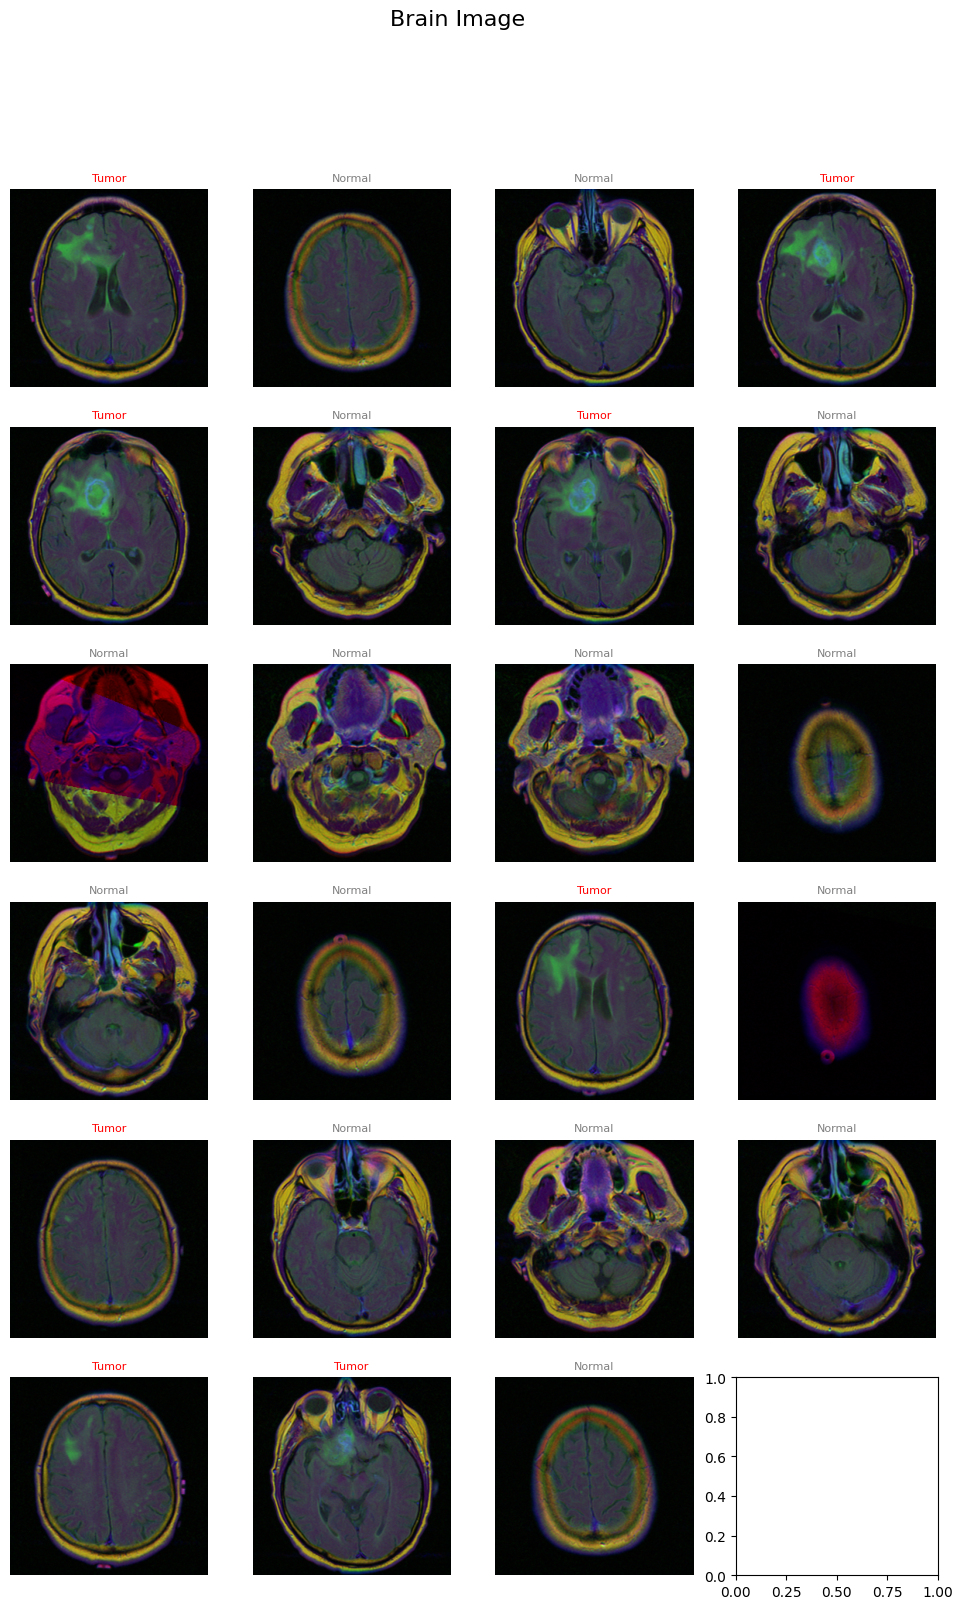

In [ ]:
# Select a patient with tumor
patient_id = mri_df[mri_df['diagnosis'] == 1]['patient_id'].iloc[0]

# Select all images of the patient
patient_images = mri_df[mri_df['patient_id'] == patient_id]['image_path'].values

# Visualize images
num_images = patient_images.shape[0]
rows = int(np.ceil(num_images / 4))
# Create a grid of subplots using matplotlib
fig, axs = plt.subplots(rows, 4, figsize=(12, 3*rows))
# Traverse through each image of the selected patient
for i, path in enumerate(patient_images):
    # Open the image file using PIL
    img = Image.open(path)
    # Check if the image has a tumor or not, and set the title and color accordingly
    if mri_df[mri_df['image_path'] == path]['diagnosis'].values[0] == 1:
        title = 'Tumor'
        color = 'red'
    else:
        title = 'Normal'
        color = 'gray'
    # Plot the image on the appropriate subplot
    axs[i//4, i%4].imshow(img, cmap='gray')
    axs[i//4, i%4].set_title(title, fontsize=8, color=color)
    axs[i//4, i%4].axis('off')
    # Close the image file
    img.close()

# Add a title to the plot
plt.suptitle('Brain Image', fontsize=16)
# Display the plot
plt.show()


The below code, reads an image file located at the 'image_path' column of the 9th row in  DataFrame 'df' and opens it using the Image module. 

(<matplotlib.image.AxesImage at 0x7fb39a4dc9a0>,)

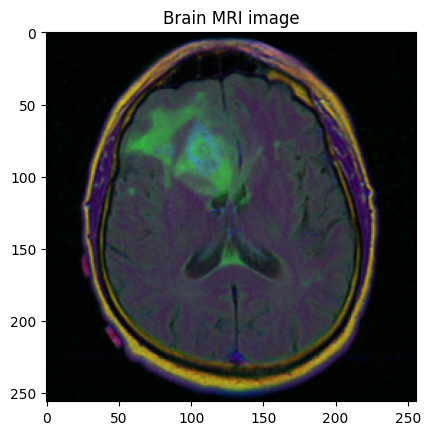

In [ ]:
from PIL import Image

img_4 = Image.open(mri_df.iloc[3]['image_path'])
plt.title('Brain MRI image')
plt.imshow(img_4),


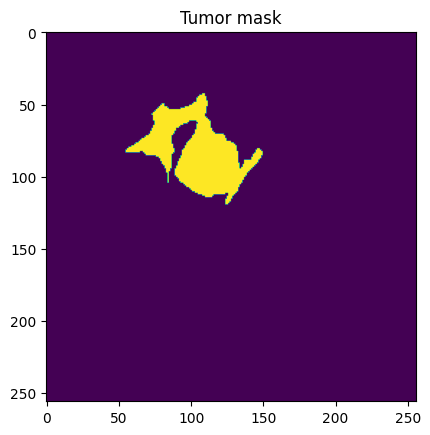

In [ ]:
img4 = Image.open(mri_df.iloc[3]['mask_path'])
plt.title('Tumor mask')
plt.imshow(img4)

# **Data Preprocessing**

The **build_df** function is used to create a pandas DataFrame containing the file paths of the images and corresponding masks in a given directory **data_dir**.

The function first creates an empty list **images_paths** to store the paths of the images. It then uses the **glob** function from the glob module to find all the mask file paths in the given directory.

In the next step, it loops over the list of mask file paths and replaces the **_mask** part of the file name with an empty string, to obtain the corresponding image file path. These image file paths are then appended to the **images_paths** list.

Finally, a pandas DataFrame is created from a dictionary with keys '**images_paths**' and 'masks_paths' and values equal to **images_paths** and masks_paths respectively.

The resulting DataFrame contains two columns: '**images_paths**' containing the file paths to the images and '**masks_paths**' containing the file paths to the corresponding masks.





In [ ]:
def build_df(data_dir):
    images_paths = []
    masks_paths = glob(f'{data_dir}/*/*_mask*')

    for i in masks_paths:
        images_paths.append(i.replace('_mask', ''))

    df = pd.DataFrame(data= {'images_paths': images_paths, 'masks_paths': masks_paths})

    return df


The code defines a function named "**segment_df**" which takes a DataFrame "df" as input. The function uses the "train_test_split" method from the Scikit-learn library to split the input DataFrame into three separate DataFrames: "train_df", "valid_df", and "test_df".

The "train_test_split" method is used twice. First, the method is called with a train_size of 0.8 to split the input DataFrame into two DataFrames, "train_df" and "dummy_df". The "dummy_df" is a temporary DataFrame that contains the remaining 20% of the original data.

Next, the method is called again with a train_size of 0.5 to split the "dummy_df" into two separate DataFrames, "valid_df" and "test_df". These two DataFrames will be used for validation and testing purposes.

Finally, the function returns the three DataFrames, "train_df", "valid_df", and "test_df".

In [ ]:
# Function to split dataframe into train, valid, test
def segment_df(df):
    # create train_df
    train_df, dummy_df = train_test_split(df, train_size= 0.6)

    # create valid_df and test_df
    valid_df, test_df = train_test_split(dummy_df, train_size= 0.5)

    return train_df, valid_df, test_df


This code defines a function called **generate_data** that takes in two arguments: **df** and **aug_dict**.

df is a Pandas dataframe that contains the paths to the images and their corresponding masks.

aug_dict is a dictionary of augmentation parameters that will be used to generate augmented images during training.

The function sets the size of the images to (256, 256) and the batch size to 32. It then creates an instance of ImageDataGenerator for the images and masks using the aug_dict parameters.

It then uses flow_from_dataframe to create generators for the images and masks. These generators will yield batches of images and masks during training.

The color_mode of the image generator is set to "rgb" to indicate that the images are in RGB format. The color_mode of the mask generator is set to "grayscale" to indicate that the masks are in grayscale format.

The gen variable creates a generator that combines the image and mask generators. This generator yields tuples of (img, msk) batches.

Finally, the function normalizes the images and masks by dividing them by 255. The mask values are then thresholded so that any value greater than 0.5 is set to 1, and any value less than or equal to 0.5 is set to 0.

The generator then yields the (img, msk) tuple to be used during model training.





In [ ]:
def generate_data(df, aug_dict):
    img_size = (256, 256)
    batch_size = 40


    img_gen = ImageDataGenerator(**aug_dict)
    msk_gen = ImageDataGenerator(**aug_dict)

    # Create general generator
    image_gen = img_gen.flow_from_dataframe(df, x_col='images_paths', class_mode=None, color_mode='rgb', target_size=img_size,
                                            batch_size=batch_size, save_to_dir=None, save_prefix='image', seed=1)

    mask_gen = msk_gen.flow_from_dataframe(df, x_col='masks_paths', class_mode=None, color_mode='grayscale', target_size=img_size,
                                            batch_size=batch_size, save_to_dir=None, save_prefix= 'mask', seed=1)

    gen = zip(image_gen, mask_gen)

    for (img, msk) in gen:
        img = img / 255
        msk = msk / 255
        msk[msk > 0.5] = 1
        msk[msk <= 0.5] = 0

        yield (img, msk)

This code is preparing the data for image segmentation task.


**train_aug_dict** variable contains the augmentation parameters to be used during training.

In [ ]:
data_dir = '/content/lgg-mri-segmentation/kaggle_3m'

df = build_df(data_dir)
train_df, valid_df, test_df = segment_df(df)


train_aug_dict = dict(rotation_range=0.2,
                            width_shift_range=0.05,
                            height_shift_range=0.05,
                            shear_range=0.05,
                            zoom_range=0.05,
                            horizontal_flip=True,
                            fill_mode='nearest')


train_gen = generate_data(train_df, aug_dict=train_aug_dict)
valid_gen = generate_data(valid_df, aug_dict={})
test_gen = generate_data(test_df, aug_dict={})


# **Metrics**

**Dice coefficient** is a metric used in image segmentation to measure the similarity between the predicted segmentation mask and the ground truth segmentation mask. The Dice coefficient is calculated as the ratio of twice the number of common pixels between the predicted and ground truth masks and the sum of the number of pixels in each mask. The range of values for the Dice coefficient is between 0 and 1, with 1 indicating a perfect match between the predicted and ground truth masks. A higher Dice coefficient indicates better segmentation performance. It is one of the most commonly used metrics in image segmentation tasks along with Intersection over Union (IoU).

**Dice loss** metric is used to measure the dissimilarity between the predicted segmentation map and the ground truth segmentation map. It is the complement of the Dice coefficient, which is a similarity metric.

The Dice loss is calculated as 1 - Dice coefficient. So a lower Dice loss indicates a better performance of the model.

**Intersection over Union (IoU)** measures the overlap between the predicted segmentation and the ground truth segmentation, and is defined as the ratio of the intersection between the two regions and the union of these regions:

IoU = (Area of Intersection) / (Area of Union)

The IoU metric is used to evaluate the accuracy of segmentation models and is particularly useful when the objects of interest have irregular shapes and sizes. A higher IoU value indicates a better segmentation performance.

In [ ]:
def dice_coef(y_true, y_pred, smooth=1):
    """
    Computes the Dice coefficient between the true and predicted masks.
    """
    intersection = K.sum(y_true * y_pred)
    union = K.sum(y_true) + K.sum(y_pred)
    dice = (2 * intersection + smooth) / (union + smooth)
    return dice

def dice_loss(y_true, y_pred, smooth=1):
    """
    Computes the Dice loss between the true and predicted masks.
    """
    dice = dice_coef(y_true, y_pred, smooth)
    loss = 1 - dice
    return loss

def iou(y_true, y_pred, smooth=1):
    """
    Computes the Intersection over Union (IoU) between the true and predicted masks.
    """
    intersection = K.sum(y_true * y_pred)
    union = K.sum(y_true) + K.sum(y_pred) - intersection
    ious = (intersection + smooth) / (union + smooth)
    return ious


# **Image Segmentation**| **U-Net**

U-Net is a convolutional neural network architecture designed for image segmentation tasks, which was introduced by Olaf Ronneberger et al. in 2015. The name "U-Net" comes from the architecture of the network, which resembles a "U" shape.

The U-Net architecture consists of an encoder network and a decoder network. The encoder network is composed of several convolutional and max pooling layers, which are used to extract features from the input image. The decoder network is composed of several deconvolutional and up-sampling layers, which are used to reconstruct the output segmentation mask.

One of the key features of the U-Net architecture is the use of skip connections between the encoder and decoder networks. These skip connections help to preserve the high-resolution features from the input image, which would otherwise be lost during the downsampling process of the encoder network.

The U-Net architecture has been widely used in various medical imaging applications, including the segmentation of brain tumors, lung nodules, and retinal blood vessels. It has also been used for other types of image segmentation tasks, such as the segmentation of cells in microscopy images and the segmentation of objects in satellite imagery.

The U-Net architecture consists of an encoder network and a decoder network, which are connected by skip connections. Here's a brief overview of the structure of the U-Net architecture:

**Encoder network:**

The encoder network is composed of several convolutional and max pooling layers, which are used to extract features from the input image. The number of filters in each convolutional layer increases with depth, while the spatial dimensions of the feature maps decrease due to the max pooling layers.

**Decoder network:**

The decoder network is composed of several deconvolutional and up-sampling layers, which are used to reconstruct the output segmentation mask. The number of filters in each deconvolutional layer decreases with depth, while the spatial dimensions of the feature maps increase due to the up-sampling layers.

**Skip connections:**

The skip connections in the U-Net architecture are used to connect the corresponding layers of the encoder and decoder networks. The skip connections allow the decoder network to access the high-resolution features from the encoder network, which would otherwise be lost during the downsampling process of the encoder network.

**Output layer:**

The output layer of the U-Net architecture is typically a convolutional layer with a sigmoid activation function, which produces a binary mask that represents the predicted segmentation of the input image.

In [ ]:
def unet_model():
    inputs = Input((256, 256, 3))

    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D((2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5)
    merge6 = concatenate([conv4, up6])
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(merge6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6)
    merge7 = concatenate([conv3, up7])
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(merge7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7)
    merge8 = concatenate([conv2, up8])
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(merge8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8)
    merge9 = concatenate([conv1, up9])
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(merge9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    model = Model(inputs=[inputs], outputs=[outputs])
    
    return model


In [ ]:
model = unet_model()
model.compile(Adamax(learning_rate= 0.001), loss= dice_loss, metrics= ['accuracy', iou, dice_coef])


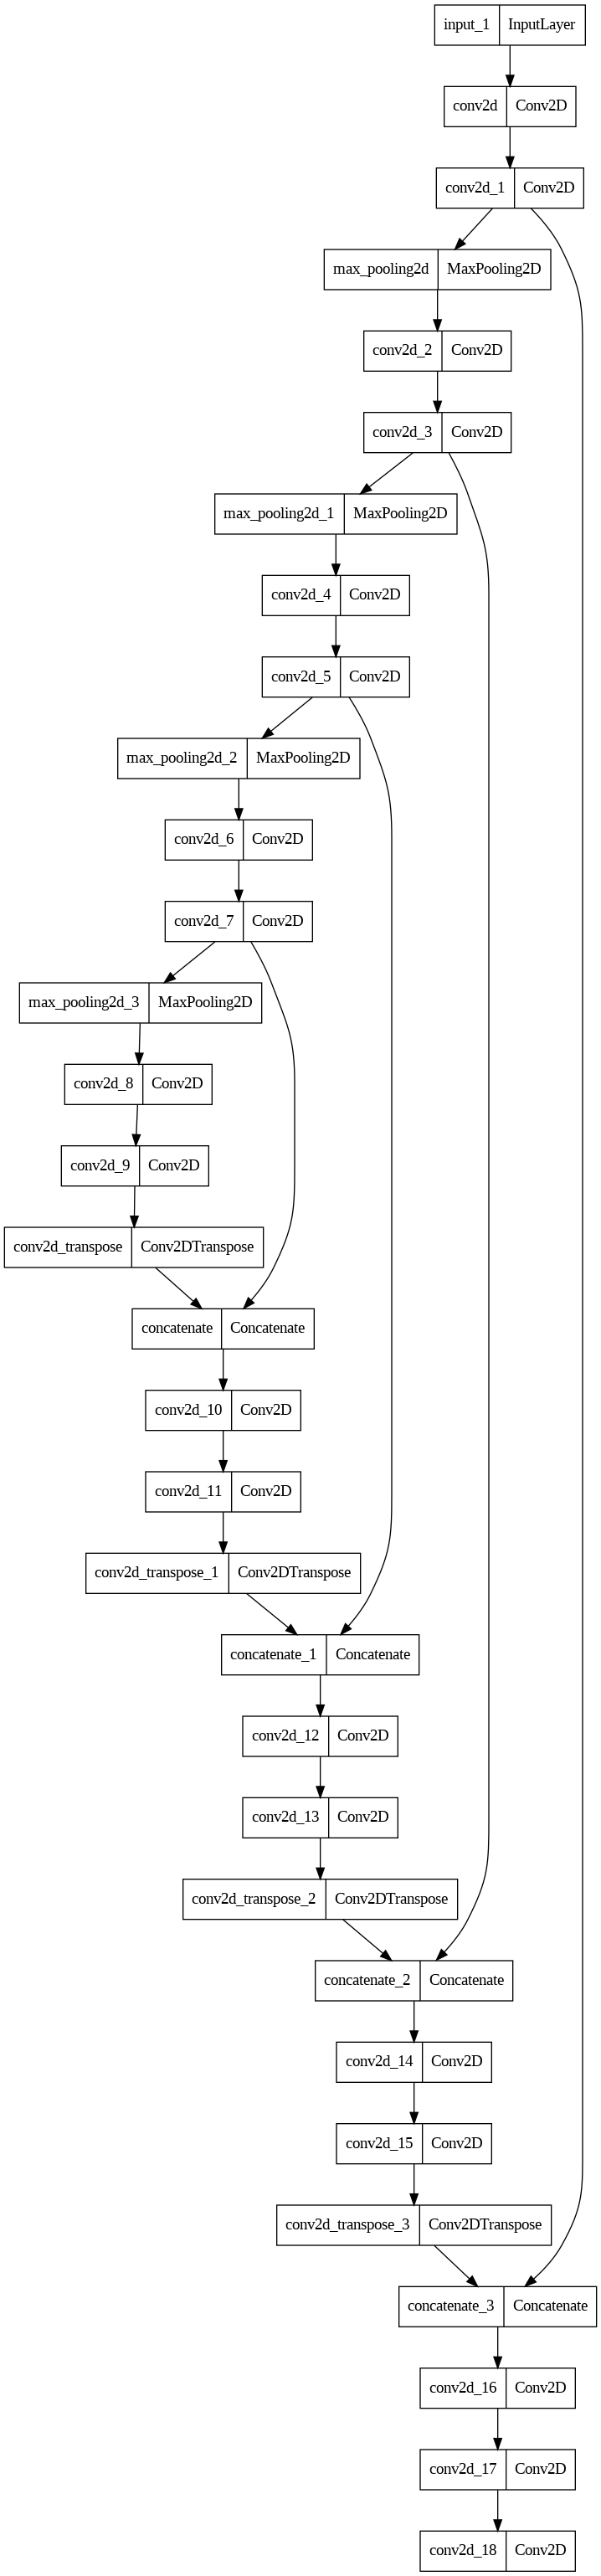

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model)

In [ ]:
epochs = 40
batch_size = 40
callbacks = [ModelCheckpoint('unet21.hdf1', verbose=0, save_best_only=True)]

history = model.fit(train_gen,
                    steps_per_epoch=len(train_df) / batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks=callbacks,
                    validation_data = valid_gen,
                    validation_steps=len(valid_df) / batch_size)

Found 2357 validated image filenames.
Found 2357 validated image filenames.
Epoch 1/40
59/58 [==============================] - ETA: 0s - loss: 0.8700 - accuracy: 0.6859 - iou: 0.0789 - dice_coef: 0.1302Found 786 validated image filenames.
Found 786 validated image filenames.


58/58 [==============================] - 132s 2s/step - loss: 0.8700 - accuracy: 0.6859 - iou: 0.0789 - dice_coef: 0.1302 - val_loss: 0.6342 - val_accuracy: 0.9775 - val_iou: 0.2285 - val_dice_coef: 0.3632
Epoch 2/40
59/58 [==============================] - ETA: 0s - loss: 0.5488 - accuracy: 0.9864 - iou: 0.3035 - dice_coef: 0.4513

58/58 [==============================] - 71s 1s/step - loss: 0.5488 - accuracy: 0.9864 - iou: 0.3035 - dice_coef: 0.4513 - val_loss: 0.5795 - val_accuracy: 0.9924 - val_iou: 0.2710 - val_dice_coef: 0.4200
Epoch 3/40
59/58 [==============================] - ETA: 0s - loss: 0.9772 - accuracy: 0.9846 - iou: 0.0119 - dice_coef: 0.0228

58/58 [==============================] - 71s 1s/step - loss: 0.9772 - accuracy: 0.9846 - iou: 0.0119 - dice_coef: 0.0228 - val_loss: 0.4896 - val_accuracy: 0.9889 - val_iou: 0.3493 - val_dice_coef: 0.5081
Epoch 4/40
59/58 [==============================] - ETA: 0s - loss: 0.4706 - accuracy: 0.9900 - iou: 0.3684 - dice_coef: 0.5294

58/58 [==============================] - 71s 1s/step - loss: 0.4706 - accuracy: 0.9900 - iou: 0.3684 - dice_coef: 0.5294 - val_loss: 0.4682 - val_accuracy: 0.9914 - val_iou: 0.3702 - val_dice_coef: 0.5341
Epoch 5/40
59/58 [==============================] - ETA: 0s - loss: 0.4569 - accuracy: 0.9904 - iou: 0.3795 - dice_coef: 0.5432

58/58 [==============================] - 71s 1s/step - loss: 0.4569 - accuracy: 0.9904 - iou: 0.3795 - dice_coef: 0.5432 - val_loss: 0.4085 - val_accuracy: 0.9927 - val_iou: 0.4281 - val_dice_coef: 0.5923
Epoch 6/40
58/58 [==============================] - 65s 1s/step - loss: 0.4567 - accuracy: 0.9907 - iou: 0.3828 - dice_coef: 0.5434 - val_loss: 0.4572 - val_accuracy: 0.9923 - val_iou: 0.3857 - val_dice_coef: 0.5437
Epoch 7/40
59/58 [==============================] - ETA: 0s - loss: 0.4221 - accuracy: 0.9916 - iou: 0.4159 - dice_coef: 0.5780

58/58 [==============================] - 70s 1s/step - loss: 0.4221 - accuracy: 0.9916 - iou: 0.4159 - dice_coef: 0.5780 - val_loss: 0.4051 - val_accuracy: 0.9920 - val_iou: 0.4287 - val_dice_coef: 0.5946
Epoch 8/40
59/58 [==============================] - ETA: 0s - loss: 0.4119 - accuracy: 0.9919 - iou: 0.4256 - dice_coef: 0.5880

58/58 [==============================] - 73s 1s/step - loss: 0.4119 - accuracy: 0.9919 - iou: 0.4256 - dice_coef: 0.5880 - val_loss: 0.4033 - val_accuracy: 0.9935 - val_iou: 0.4337 - val_dice_coef: 0.5976
Epoch 9/40
59/58 [==============================] - ETA: 0s - loss: 0.3799 - accuracy: 0.9924 - iou: 0.4607 - dice_coef: 0.6202

58/58 [==============================] - 72s 1s/step - loss: 0.3799 - accuracy: 0.9924 - iou: 0.4607 - dice_coef: 0.6202 - val_loss: 0.3614 - val_accuracy: 0.9942 - val_iou: 0.4751 - val_dice_coef: 0.6407
Epoch 10/40
59/58 [==============================] - ETA: 0s - loss: 0.3807 - accuracy: 0.9925 - iou: 0.4567 - dice_coef: 0.6193

58/58 [==============================] - 71s 1s/step - loss: 0.3807 - accuracy: 0.9925 - iou: 0.4567 - dice_coef: 0.6193 - val_loss: 0.3289 - val_accuracy: 0.9944 - val_iou: 0.5200 - val_dice_coef: 0.6744
Epoch 11/40
58/58 [==============================] - 66s 1s/step - loss: 0.3533 - accuracy: 0.9931 - iou: 0.4854 - dice_coef: 0.6466 - val_loss: 0.4317 - val_accuracy: 0.9905 - val_iou: 0.4106 - val_dice_coef: 0.5719
Epoch 12/40
58/58 [==============================] - 68s 1s/step - loss: 0.9526 - accuracy: 0.9123 - iou: 0.0245 - dice_coef: 0.0474 - val_loss: 0.9240 - val_accuracy: 0.7790 - val_iou: 0.0402 - val_dice_coef: 0.0770
Epoch 13/40
59/58 [==============================] - ETA: 0s - loss: 0.4341 - accuracy: 0.9685 - iou: 0.4184 - dice_coef: 0.5661

58/58 [==============================] - 71s 1s/step - loss: 0.4341 - accuracy: 0.9685 - iou: 0.4184 - dice_coef: 0.5661 - val_loss: 0.3190 - val_accuracy: 0.9944 - val_iou: 0.5248 - val_dice_coef: 0.6826
Epoch 14/40
58/58 [==============================] - 66s 1s/step - loss: 0.3104 - accuracy: 0.9938 - iou: 0.5349 - dice_coef: 0.6895 - val_loss: 0.3550 - val_accuracy: 0.9936 - val_iou: 0.4837 - val_dice_coef: 0.6451
Epoch 15/40
59/58 [==============================] - ETA: 0s - loss: 0.3036 - accuracy: 0.9940 - iou: 0.5419 - dice_coef: 0.6965

58/58 [==============================] - 69s 1s/step - loss: 0.3036 - accuracy: 0.9940 - iou: 0.5419 - dice_coef: 0.6965 - val_loss: 0.2762 - val_accuracy: 0.9954 - val_iou: 0.5700 - val_dice_coef: 0.7214
Epoch 16/40
58/58 [==============================] - 65s 1s/step - loss: 0.2916 - accuracy: 0.9942 - iou: 0.5566 - dice_coef: 0.7082 - val_loss: 0.3337 - val_accuracy: 0.9948 - val_iou: 0.5116 - val_dice_coef: 0.6652
Epoch 17/40
58/58 [==============================] - 65s 1s/step - loss: 0.3028 - accuracy: 0.9941 - iou: 0.5435 - dice_coef: 0.6972 - val_loss: 0.2993 - val_accuracy: 0.9956 - val_iou: 0.5476 - val_dice_coef: 0.7012
Epoch 18/40
58/58 [==============================] - 66s 1s/step - loss: 0.2828 - accuracy: 0.9946 - iou: 0.5656 - dice_coef: 0.7171 - val_loss: 0.2787 - val_accuracy: 0.9948 - val_iou: 0.5690 - val_dice_coef: 0.7217
Epoch 19/40
59/58 [==============================] - ETA: 0s - loss: 0.2751 - accuracy: 0.9946 - iou: 0.5741 - dice_coef: 0.7249

58/58 [==============================] - 70s 1s/step - loss: 0.2751 - accuracy: 0.9946 - iou: 0.5741 - dice_coef: 0.7249 - val_loss: 0.2501 - val_accuracy: 0.9956 - val_iou: 0.6087 - val_dice_coef: 0.7509
Epoch 20/40
58/58 [==============================] - 64s 1s/step - loss: 0.2758 - accuracy: 0.9945 - iou: 0.5752 - dice_coef: 0.7240 - val_loss: 0.3228 - val_accuracy: 0.9948 - val_iou: 0.5178 - val_dice_coef: 0.6773
Epoch 21/40
59/58 [==============================] - ETA: 0s - loss: 0.2748 - accuracy: 0.9949 - iou: 0.5839 - dice_coef: 0.7253

58/58 [==============================] - 71s 1s/step - loss: 0.2748 - accuracy: 0.9949 - iou: 0.5839 - dice_coef: 0.7253 - val_loss: 0.2397 - val_accuracy: 0.9959 - val_iou: 0.6207 - val_dice_coef: 0.7621
Epoch 22/40
58/58 [==============================] - 65s 1s/step - loss: 0.2517 - accuracy: 0.9951 - iou: 0.6043 - dice_coef: 0.7482 - val_loss: 0.2667 - val_accuracy: 0.9952 - val_iou: 0.5871 - val_dice_coef: 0.7348
Epoch 23/40
59/58 [==============================] - ETA: 0s - loss: 0.2573 - accuracy: 0.9950 - iou: 0.5977 - dice_coef: 0.7427

58/58 [==============================] - 69s 1s/step - loss: 0.2573 - accuracy: 0.9950 - iou: 0.5977 - dice_coef: 0.7427 - val_loss: 0.2319 - val_accuracy: 0.9957 - val_iou: 0.6261 - val_dice_coef: 0.7676
Epoch 24/40
58/58 [==============================] - 65s 1s/step - loss: 0.2486 - accuracy: 0.9952 - iou: 0.6098 - dice_coef: 0.7513 - val_loss: 0.2363 - val_accuracy: 0.9961 - val_iou: 0.6267 - val_dice_coef: 0.7634
Epoch 25/40
58/58 [==============================] - 65s 1s/step - loss: 0.2575 - accuracy: 0.9947 - iou: 0.5976 - dice_coef: 0.7426 - val_loss: 0.2403 - val_accuracy: 0.9959 - val_iou: 0.6225 - val_dice_coef: 0.7597
Epoch 26/40
58/58 [==============================] - 66s 1s/step - loss: 0.2714 - accuracy: 0.9944 - iou: 0.5840 - dice_coef: 0.7285 - val_loss: 0.2522 - val_accuracy: 0.9954 - val_iou: 0.5982 - val_dice_coef: 0.7461
Epoch 27/40
58/58 [==============================] - 65s 1s/step - loss: 0.2423 - accuracy: 0.9952 - iou: 0.6187 - dice_coef: 0.7572 - val_loss:

58/58 [==============================] - 70s 1s/step - loss: 0.2191 - accuracy: 0.9957 - iou: 0.6502 - dice_coef: 0.7810 - val_loss: 0.2050 - val_accuracy: 0.9967 - val_iou: 0.6657 - val_dice_coef: 0.7965
Epoch 30/40
58/58 [==============================] - 66s 1s/step - loss: 0.2130 - accuracy: 0.9957 - iou: 0.6549 - dice_coef: 0.7870 - val_loss: 0.2331 - val_accuracy: 0.9954 - val_iou: 0.6240 - val_dice_coef: 0.7663
Epoch 31/40
59/58 [==============================] - ETA: 0s - loss: 0.2020 - accuracy: 0.9959 - iou: 0.6693 - dice_coef: 0.7980

58/58 [==============================] - 69s 1s/step - loss: 0.2020 - accuracy: 0.9959 - iou: 0.6693 - dice_coef: 0.7980 - val_loss: 0.2036 - val_accuracy: 0.9964 - val_iou: 0.6646 - val_dice_coef: 0.7970
Epoch 32/40
58/58 [==============================] - 64s 1s/step - loss: 0.2068 - accuracy: 0.9959 - iou: 0.6628 - dice_coef: 0.7932 - val_loss: 0.2156 - val_accuracy: 0.9962 - val_iou: 0.6503 - val_dice_coef: 0.7847
Epoch 33/40
58/58 [==============================] - 66s 1s/step - loss: 0.1911 - accuracy: 0.9961 - iou: 0.6836 - dice_coef: 0.8090 - val_loss: 0.2052 - val_accuracy: 0.9964 - val_iou: 0.6611 - val_dice_coef: 0.7938
Epoch 34/40
59/58 [==============================] - ETA: 0s - loss: 0.1870 - accuracy: 0.9963 - iou: 0.6925 - dice_coef: 0.8130

58/58 [==============================] - 70s 1s/step - loss: 0.1870 - accuracy: 0.9963 - iou: 0.6925 - dice_coef: 0.8130 - val_loss: 0.1948 - val_accuracy: 0.9967 - val_iou: 0.6790 - val_dice_coef: 0.8067
Epoch 35/40
59/58 [==============================] - ETA: 0s - loss: 0.2000 - accuracy: 0.9961 - iou: 0.6744 - dice_coef: 0.8000

58/58 [==============================] - 69s 1s/step - loss: 0.2000 - accuracy: 0.9961 - iou: 0.6744 - dice_coef: 0.8000 - val_loss: 0.1846 - val_accuracy: 0.9966 - val_iou: 0.6936 - val_dice_coef: 0.8174
Epoch 36/40
58/58 [==============================] - 65s 1s/step - loss: 0.9464 - accuracy: 0.9727 - iou: 0.0285 - dice_coef: 0.0537 - val_loss: 0.8174 - val_accuracy: 0.9187 - val_iou: 0.1009 - val_dice_coef: 0.1817
Epoch 37/40
58/58 [==============================] - 64s 1s/step - loss: 0.3264 - accuracy: 0.9888 - iou: 0.5373 - dice_coef: 0.6737 - val_loss: 0.2132 - val_accuracy: 0.9963 - val_iou: 0.6593 - val_dice_coef: 0.7881
Epoch 38/40
58/58 [==============================] - 66s 1s/step - loss: 0.1971 - accuracy: 0.9958 - iou: 0.6768 - dice_coef: 0.8029 - val_loss: 0.2218 - val_accuracy: 0.9960 - val_iou: 0.6410 - val_dice_coef: 0.7785
Epoch 39/40
58/58 [==============================] - 64s 1s/step - loss: 0.1918 - accuracy: 0.9962 - iou: 0.6854 - dice_coef: 0.8082 - val_loss:

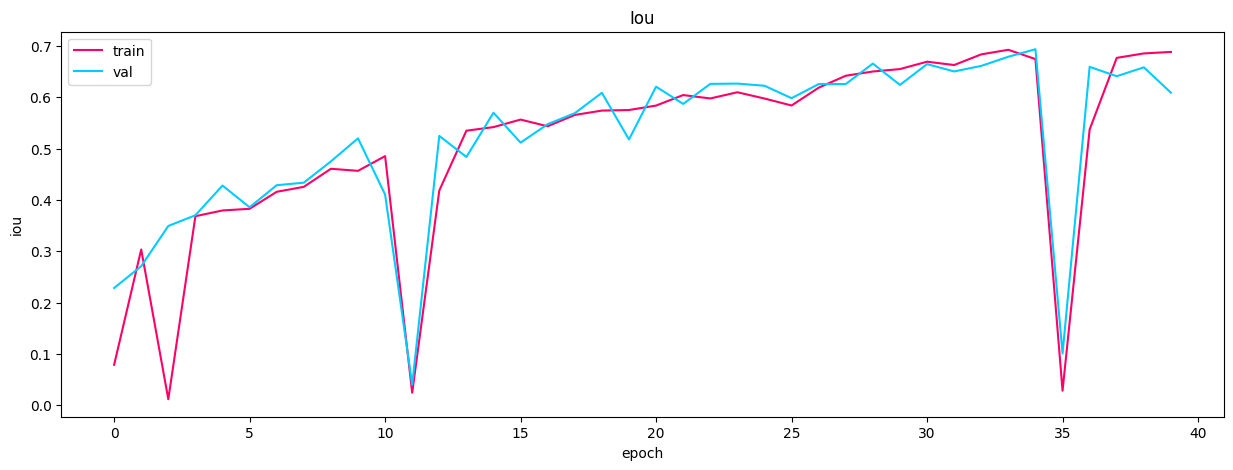

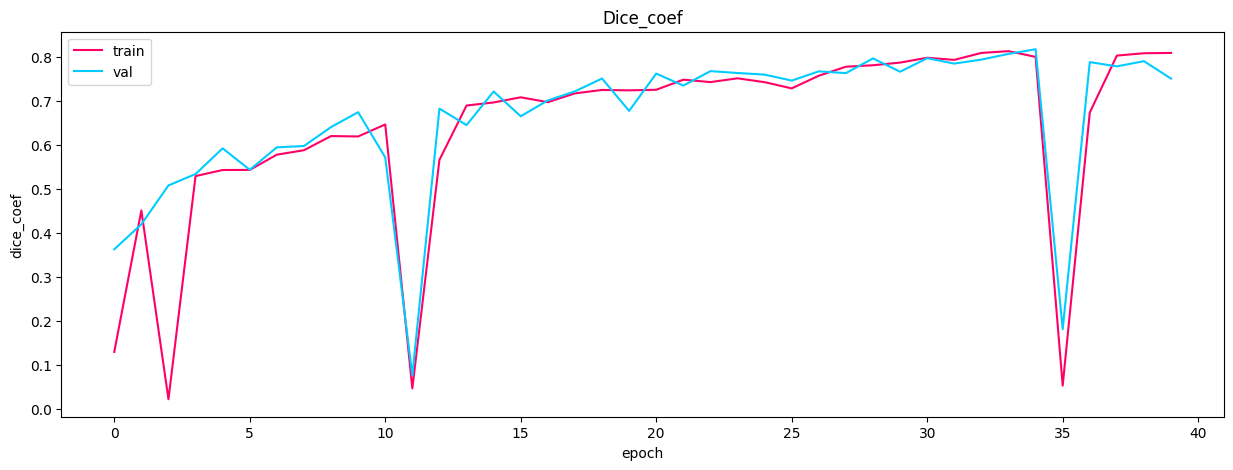

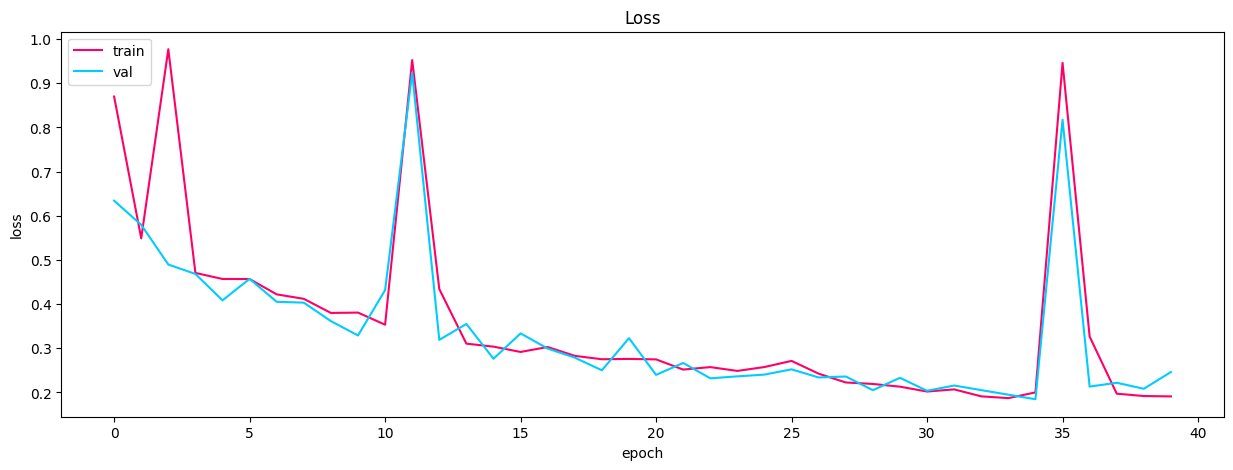

In [ ]:
def plot_metric(history, metric_name):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]
    epochs = range(len(metric))

    plt.figure(figsize=(15, 5))
    plt.plot(epochs, metric, 'b', color='#ff0066')
    plt.plot(epochs, val_metric, color='#00ccff')
    plt.legend(['train', 'val'], loc='upper left')
    plt.ylabel(metric_name)
    plt.xlabel('epoch')
    plt.title(metric_name.capitalize())


plot_metric(history, 'iou')
plot_metric(history, 'dice_coef')
plot_metric(history, 'loss')


# **Model Evaluation**

In [ ]:
t = len(test_df)
batch_size_test = max(sorted([t // n for n in range(1, t + 1) if t%n == 0 and t/n <= 80]))
test_steps = t // batch_size_test

score_train = model.evaluate(train_gen, steps= test_steps, verbose= 1)
score_valid = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
score_test = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print(f"{'Train':<10} {'Loss:':<10} {score_train[0]:.4f}  {'Accuracy:':<10} {score_train[1]:.4f}  {'IoU:':<10} {score_train[2]:.4f}  {'Dice:':<10} {score_train[3]:.4f}")
print(f"{'Valid':<10} {'Loss:':<10} {score_valid[0]:.4f}  {'Accuracy:':<10} {score_valid[1]:.4f}  {'IoU:':<10} {score_valid[2]:.4f}  {'Dice:':<10} {score_valid[3]:.4f}")
print(f"{'Test':<10} {'Loss:':<10} {score_test[0]:.4f}  {'Accuracy:':<10} {score_test[1]:.4f}  {'IoU:':<10} {score_test[2]:.4f}  {'Dice:':<10} {score_test[3]:.4f}")





131/131 [==============================] - 28s 212ms/step - loss: 0.2366 - accuracy: 0.9963 - iou: 0.6225 - dice_coef: 0.7632
Found 786 validated image filenames.
Found 786 validated image filenames.
131/131 [==============================] - 28s 212ms/step - loss: 0.2428 - accuracy: 0.9959 - iou: 0.6148 - dice_coef: 0.7570
Train      Loss:      0.2155  Accuracy:  0.9961  IoU:       0.6494  Dice:      0.7845
Valid      Loss:      0.2366  Accuracy:  0.9963  IoU:       0.6225  Dice:      0.7632
Test       Loss:      0.2428  Accuracy:  0.9959  IoU:       0.6148  Dice:      0.7570


Test       Loss:      0.2428  Accuracy:  0.9959  IoU:       0.6148  Dice:      0.7570
This is the performance report for a segmentation model on the train, validation, and test datasets.

**Train Loss:** the average loss (error) on the training set during training. A lower loss indicates better performance. In this case, the loss is 0.2155.

**Accuracy:** the proportion of correctly classified pixels in the training set during training. An accuracy of 1.0 indicates perfect performance. In this case, the accuracy is 0.9961.

**IoU (Intersection over Union):** a measure of how well the model's predicted segmentation masks overlap with the ground truth masks. IoU values range from 0 to 1, where higher values indicate better performance. In this case, the IoU on the training set is 0.6494.

**Dice:** another measure of how well the model's predicted segmentation masks overlap with the ground truth masks, similar to IoU. Dice scores range from 0 to 1, where higher values indicate better performance. In this case, the Dice score on the training set is 0.7845.

The same metrics are reported for the validation and test datasets, which are used to evaluate the model's generalization performance on unseen data. The validation and test set performances are slightly worse than the training set performance, which is expected as the model is optimized on the training set.

Overall, these performance metrics suggest that the segmentation model is performing reasonably well, with high accuracy and reasonable IoU and Dice scores. However, the model's performance on the test set is slightly worse than on the training and validation sets, which could indicate overfitting or lack of generalization.

# **Prediction**

In [ ]:
def plot_predictions(model, df, num_predictions=20):
    """
    This function randomly selects and plots a given number of predictions made by the model.

    Args:
    model (keras.Model): Trained U-Net model.
    df (pandas.DataFrame): Dataframe containing image and mask file paths.
    num_predictions (int): Number of predictions to plot. Default is 20.
    """

    # Loop over a given number of predictions
    for i in range(num_predictions):
        # Randomly select an image and its corresponding mask
        index = np.random.randint(1, len(df.index))
        img_path = df['images_paths'].iloc[index]
        mask_path = df['masks_paths'].iloc[index]

        # Read and resize the image and its corresponding mask
        img = cv2.imread(img_path)
        img = cv2.resize(img, (256, 256))
        img = img/255
        img = img[np.newaxis, :, :, : ]

        mask = cv2.imread(mask_path)
        mask = cv2.resize(mask, (256, 256))
        mask = mask/255
        mask = mask[np.newaxis, :, :, : ]

        # Generate a prediction
        predicted_mask = model.predict(img)

        # Plot the original image and mask, and the predicted mask
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        plt.imshow(np.squeeze(img))
        plt.axis('off')
        plt.title('Image')

        plt.subplot(1, 3, 2)
        plt.imshow(np.squeeze(mask))
        plt.axis('off')
        plt.title('Mask')

        plt.subplot(1, 3, 3)
        plt.imshow(np.squeeze(predicted_mask) > 0.5)
        plt.title('Prediction')
        plt.axis('off')

        plt.show()


1/1 [==============================] - 1s 1s/step


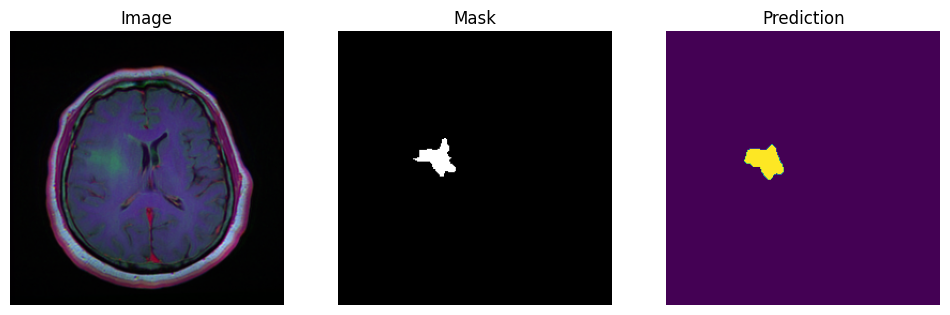

1/1 [==============================] - 0s 46ms/step


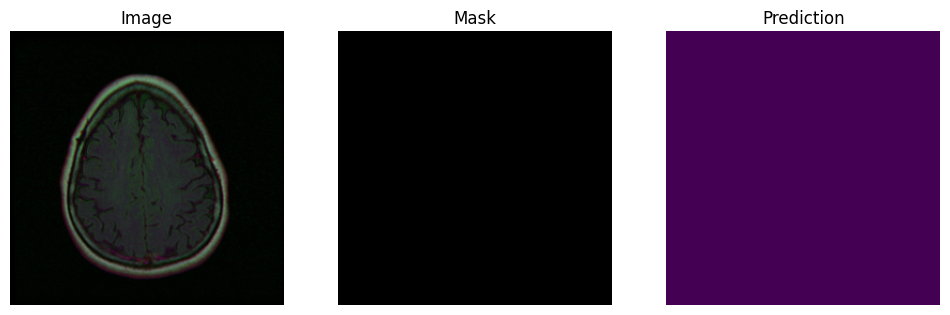

1/1 [==============================] - 0s 34ms/step


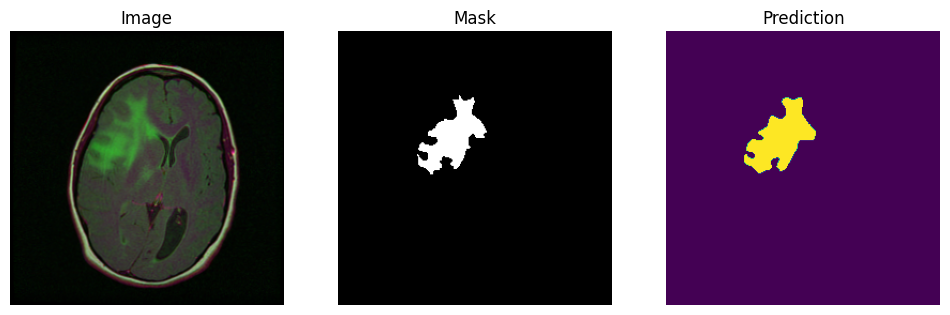

1/1 [==============================] - 0s 29ms/step


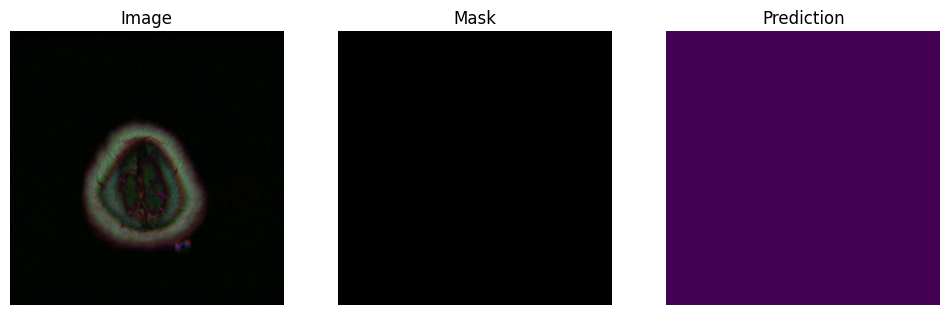

1/1 [==============================] - 0s 29ms/step


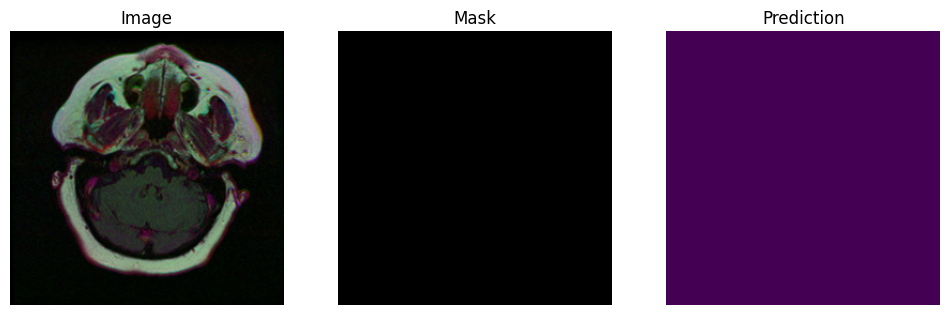

1/1 [==============================] - 0s 46ms/step


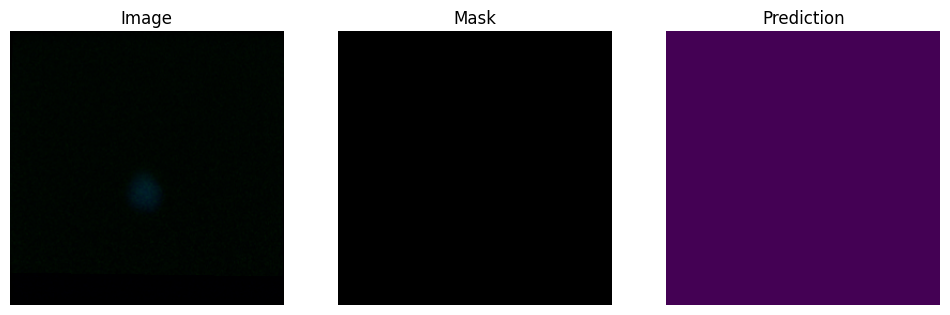

1/1 [==============================] - 0s 39ms/step


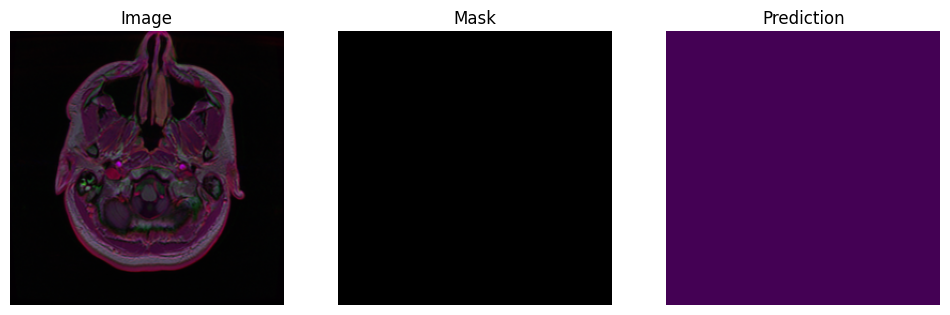

1/1 [==============================] - 0s 25ms/step


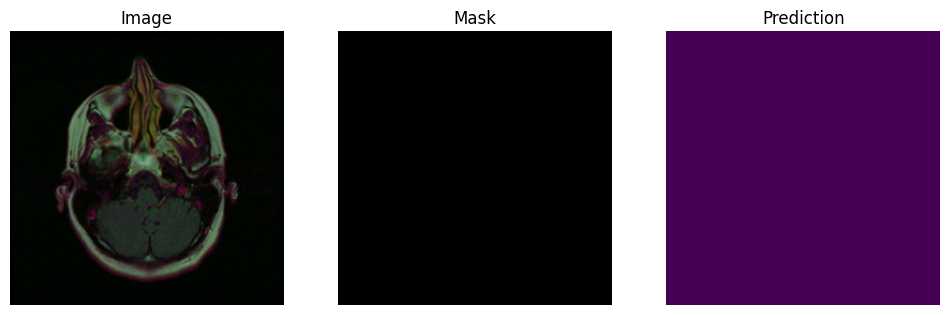

1/1 [==============================] - 0s 25ms/step


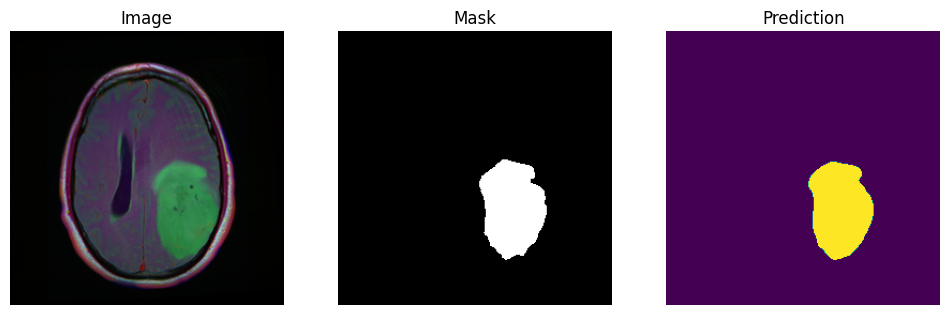

1/1 [==============================] - 0s 23ms/step


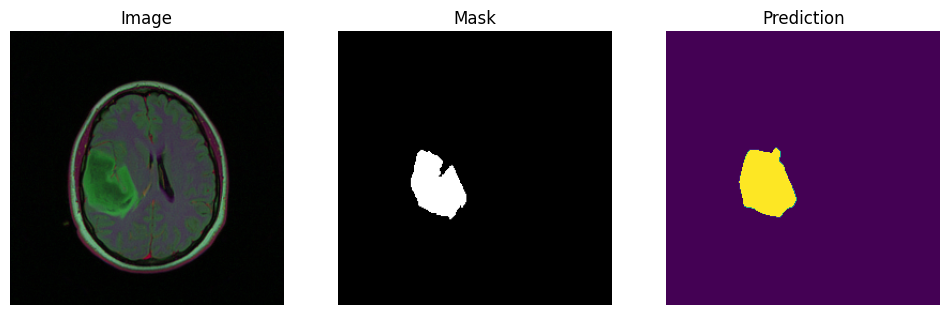

1/1 [==============================] - 0s 21ms/step


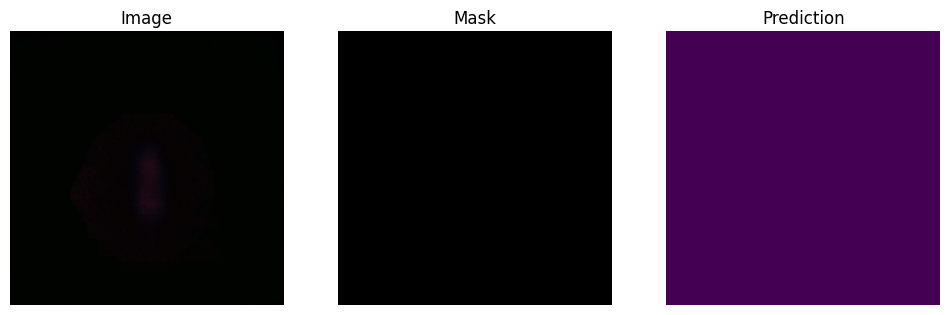

1/1 [==============================] - 0s 22ms/step


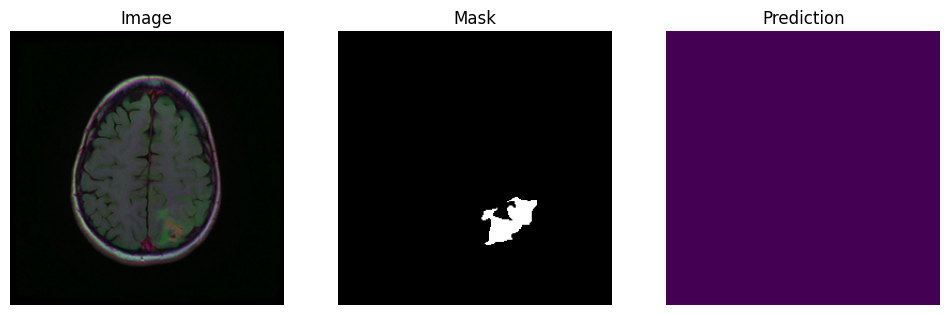

1/1 [==============================] - 0s 22ms/step


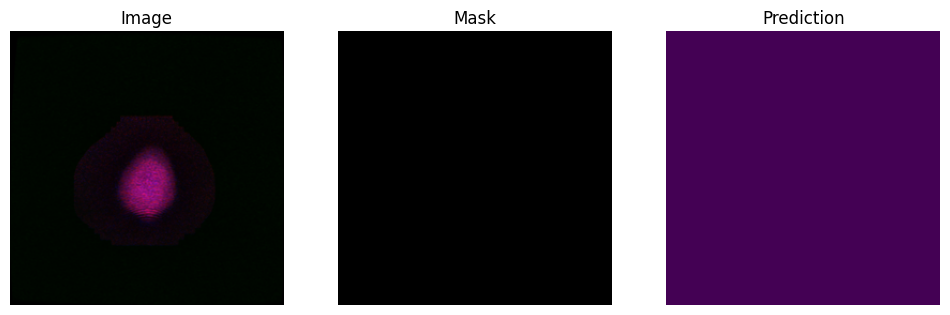

1/1 [==============================] - 0s 23ms/step


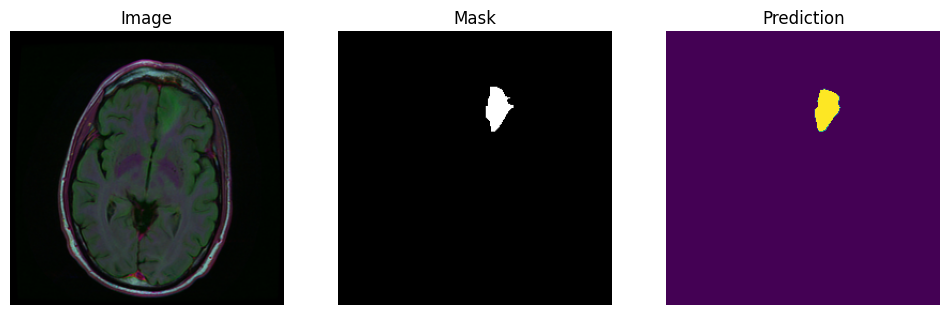

1/1 [==============================] - 0s 23ms/step


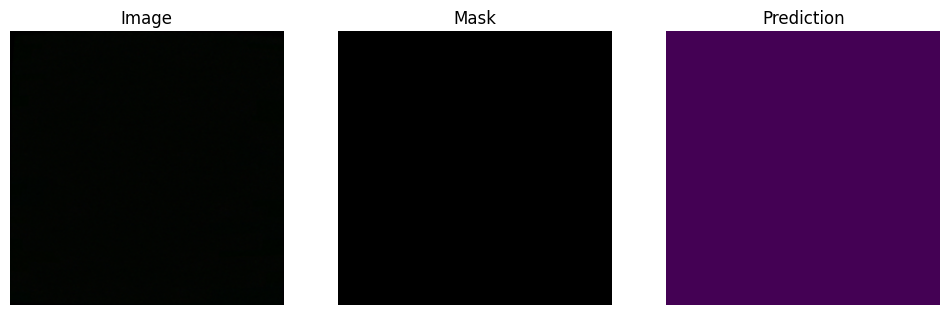

1/1 [==============================] - 0s 21ms/step


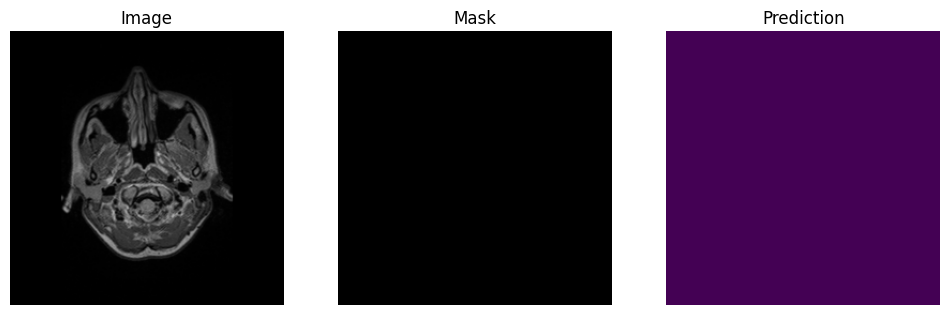

1/1 [==============================] - 0s 29ms/step


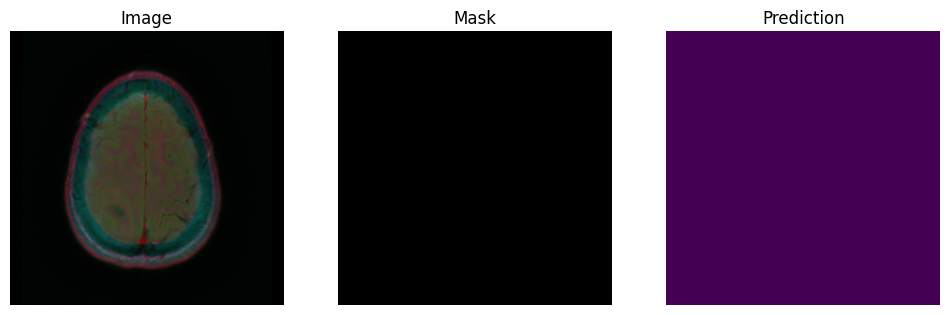

1/1 [==============================] - 0s 26ms/step


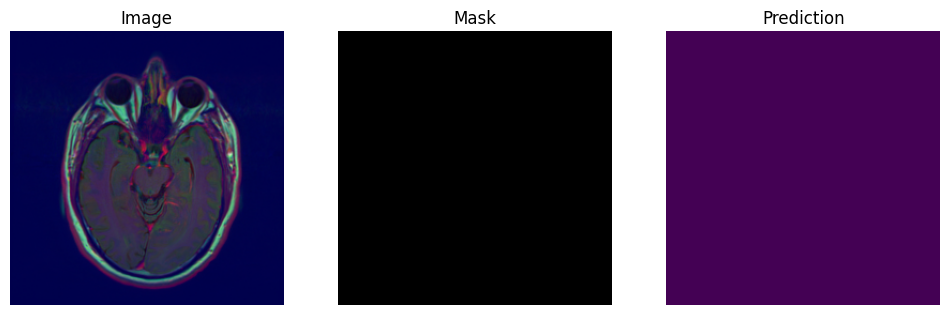

1/1 [==============================] - 0s 22ms/step


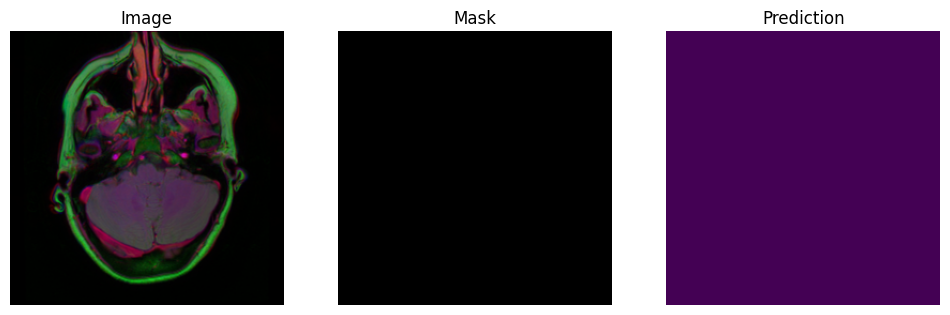

1/1 [==============================] - 0s 34ms/step


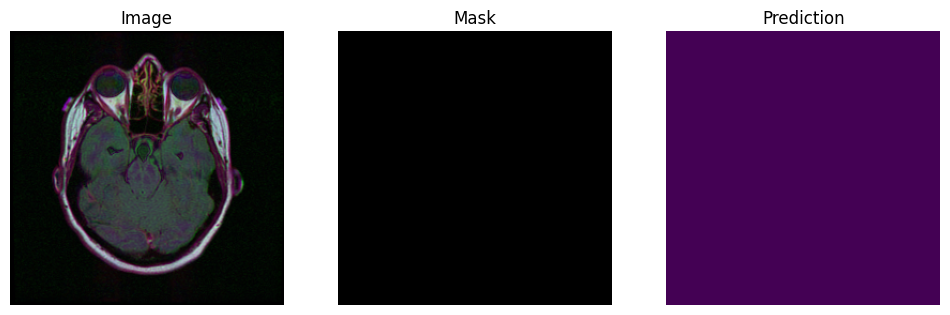

In [ ]:
plot_predictions(model, test_df)
